In [60]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color
from skimage.util import img_as_ubyte
from sklearn.decomposition import PCA


1. Loading and displaying the original image

In [18]:
image = io.imread('car.jpg')


converting colored image to gray_image

In [19]:
gray_image=color.rgb2gray(image)

In [20]:
gray_image

array([[0.12723216, 0.12723216, 0.13115373, ..., 0.09987137, 0.11330275,
        0.12506745],
       [0.12723216, 0.12723216, 0.13115373, ..., 0.1152749 , 0.13291059,
        0.14859686],
       [0.12331059, 0.12723216, 0.12723216, ..., 0.13683216, 0.1659498 ,
        0.18499216],
       ...,
       [0.01881922, 0.02274078, 0.02274078, ..., 0.07878157, 0.07878157,
        0.07878157],
       [0.01881922, 0.01881922, 0.02274078, ..., 0.07486   , 0.07486   ,
        0.07878157],
       [0.01881922, 0.01881922, 0.01881922, ..., 0.07486   , 0.07486   ,
        0.07486   ]])

Text(0.5, 1.0, 'Original Image')

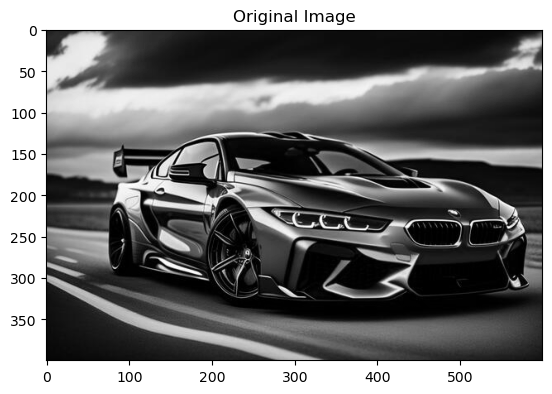

In [26]:
plt.imshow(gray_image,cmap="gray")
plt.title('Original Image')

In [31]:
image.shape

(400, 600, 3)

In [30]:
flatten_image = gray_image.reshape(gray_image.shape[0],-1)
flatten_image.shape

(400, 600)

In [37]:
# creating PCA object
pc=PCA(n_components=0.93)

In [41]:
transform_data=pc.fit_transform(gray_image)
transform_data

array([[-4.52288688e+00,  2.66217683e-01, -2.15925574e+00, ...,
        -2.62788512e-01, -4.01850769e-02,  7.71625291e-02],
       [-4.50214518e+00,  7.60575088e-02, -2.04926112e+00, ...,
        -2.74134897e-01, -2.04954560e-02,  4.68872010e-02],
       [-4.47244497e+00, -2.30138388e-01, -1.86597642e+00, ...,
        -2.89682050e-01, -2.45929520e-03, -9.71983445e-03],
       ...,
       [-2.10705795e+00,  3.35525142e+00, -1.88402680e+00, ...,
        -1.36986934e-01,  7.11984845e-02, -1.27719184e-01],
       [-2.20751404e+00,  3.27233254e+00, -1.88660310e+00, ...,
        -3.27107162e-01, -2.77567541e-02, -4.71763646e-02],
       [-2.29598943e+00,  3.19911719e+00, -1.86556338e+00, ...,
        -5.49440350e-01, -9.57259073e-02,  1.74815559e-02]])

reducing the image to the original image

In [46]:
reconstructed_image=pc.inverse_transform(transform_data)

In [47]:
reconstructed_image

array([[0.10678795, 0.11240099, 0.11990452, ..., 0.09872684, 0.10519697,
        0.10962988],
       [0.11491691, 0.12009779, 0.12719826, ..., 0.10816619, 0.11409716,
        0.11823181],
       [0.13051851, 0.13488607, 0.14111719, ..., 0.12422495, 0.12939605,
        0.13317233],
       ...,
       [0.01611329, 0.01755854, 0.01898826, ..., 0.06412015, 0.06307815,
        0.06170219],
       [0.00932636, 0.01054795, 0.01206465, ..., 0.055839  , 0.05671132,
        0.0563293 ],
       [0.00442652, 0.00553576, 0.00725354, ..., 0.05073483, 0.05330906,
        0.05387923]])

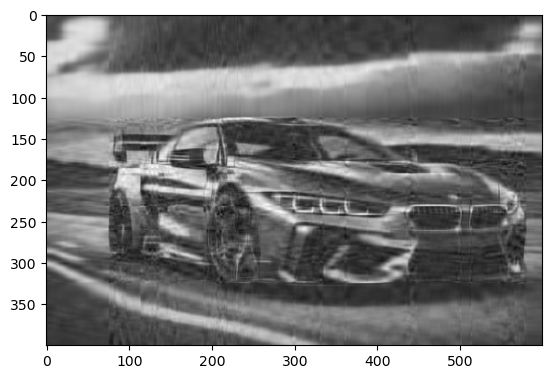

In [48]:
plt.imshow(reconstructed_image,cmap='gray')

In [50]:
io.imsave('compressed_image.jpg',reconstructed_image)

Lossy conversion from float64 to uint8. Range [-0.2661664891952339, 1.1254641485007217]. Convert image to uint8 prior to saving to suppress this warning.


In [51]:
# If the reconstructed_image having negative values then we should normalize the data 

# Normalize the data
# should do the normalization manually 
# here compressed_image_normalize should replace with reconstructed_image
# compressed_image_normalize = ((compressed_image_normalize-compressed_image_normalize.min())/(compressed_image_normalize.max()-compressed_image_normalize.min()))
# ompressed_image_normalize.max
# from sklearn.preprocessing import MinMaxScaler
# mx=MinMaxScaler()
# compressed_image_normalize = mx.fit_transform(reconstructed_image)
# convert_image_byte=img_as_ubyte(reconstructed_image)
# io.imsave('new_image.jpg',convert_image_byte3)

In [59]:
def compressed(img):
    flatten_image = gray_image.reshape(gray_image.shape[0],-1)
    pc=PCA(n_components=0.93)
    transform_data=pc.fit_transform(gray_image)
    reconstructed_image=pc.inverse_transform(transform_data)
    io.imsave('compressed_image2.jpg',reconstructed_image)
compressed(img)
    
    


Lossy conversion from float64 to uint8. Range [-0.2661664891952339, 1.1254641485007217]. Convert image to uint8 prior to saving to suppress this warning.


In [58]:
img=io.imread('car.jpg')